# Pin study: comparing CE and multigroup results within OpenMC

## Import modules

In [86]:
import sys
import os

import openmc
import openmc.mgxs as mgxs

import numpy as np
import matplotlib.pyplot as plt
import copy as copy

import pandas as pd
from IPython.display import Image
import glob

## Add location of OpenMC XS executable, setup ENDF xs path

In [87]:
import os

# Add path to OpenMC binary
# os.environ['PATH'] += r':/path/to/openmc/bin'
os.environ['PATH'] += r':/Users/jean.ragusa/repo/openmc/local/bin'

# Add location of OpenMC xs data
%env OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-viii.0-hdf5/cross_sections.xml

env: OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-viii.0-hdf5/cross_sections.xml


## Cleanup .xml files 

In [88]:
# clean_file_list = ["model.xml", "materials.xml", "geometry.xml","plots.xml","geometry.xml",\
#                    "settings.xml","tallies.out","summary.h5","statepoint.50.h5"]

# for file in clean_file_list :
#     path_file = os.path.join(os.getcwd(), file)
#     if os.path.exists(path_file):
#         os.remove(path_file)

## Start model

In [89]:
model=openmc.Model()

### Define Materials

In [90]:
uo2 = openmc.Material(name='uo2')

uo2.add_nuclide('U234', 6.11864E-06, 'ao')
uo2.add_nuclide('U235', 7.18132E-04, 'ao')
uo2.add_nuclide('U236', 3.29861E-06, 'ao')
uo2.add_nuclide('U238', 2.21546E-02, 'ao')
uo2.add_nuclide('O16', 4.57642E-02, 'ao')

uo2.set_density('g/cm3', 10.257 )

In [91]:
zirconium = openmc.Material(name="zirconium")

zirconium.add_nuclide('Zr90', 2.18865E-02, 'ao')
zirconium.add_nuclide('Zr91', 4.77292E-03, 'ao')
zirconium.add_nuclide('Zr92', 7.29551E-03, 'ao')
zirconium.add_nuclide('Zr94', 7.39335E-03, 'ao')
zirconium.add_nuclide('Zr96', 1.19110E-03, 'ao')
zirconium.add_nuclide('Sn112',4.68066E-06, 'ao')
zirconium.add_nuclide('Sn114', 3.18478E-06, 'ao')
zirconium.add_nuclide('Sn115', 1.64064E-06, 'ao')
zirconium.add_nuclide('Sn116', 7.01616E-05, 'ao')
zirconium.add_nuclide('Sn117', 3.70592E-05, 'ao')
zirconium.add_nuclide('Sn118', 1.16872E-04, 'ao')
zirconium.add_nuclide('Sn119', 4.14504E-05, 'ao')
zirconium.add_nuclide('Sn120', 1.57212E-04, 'ao')
zirconium.add_nuclide('Sn122', 2.23417E-05, 'ao')
zirconium.add_nuclide('Sn124', 2.79392E-05, 'ao')
zirconium.add_nuclide('Fe54', 8.68307E-06, 'ao')
zirconium.add_nuclide('Fe56', 1.36306E-04, 'ao')
zirconium.add_nuclide('Fe57', 3.14789E-06, 'ao')
zirconium.add_nuclide('Fe58', 4.18926E-07, 'ao')
zirconium.add_nuclide('Cr50', 3.30121E-06, 'ao')
zirconium.add_nuclide('Cr52', 6.36606E-05, 'ao')
zirconium.add_nuclide('Cr53', 7.21860E-06, 'ao')
zirconium.add_nuclide('Cr54', 1.79686E-06, 'ao')
zirconium.add_nuclide('Hf174', 3.54138E-09, 'ao')
zirconium.add_nuclide('Hf176', 1.16423E-07, 'ao')
zirconium.add_nuclide('Hf177', 4.11686E-07, 'ao')
zirconium.add_nuclide('Hf178', 6.03806E-07, 'ao')
zirconium.add_nuclide('Hf179', 3.01460E-07, 'ao')
zirconium.add_nuclide('Hf180', 7.76449E-07, 'ao')

zirconium.set_density('g/cm3',  6.56)

In [92]:
water = openmc.Material(name="water")

water.add_nuclide('H1',4.96224E-02, 'ao')
water.add_nuclide('O16', 2.48112E-02, 'ao')
water.add_nuclide('B10', 1.07070E-05, 'ao')
water.add_nuclide('B11', 4.30971E-05, 'ao')

water.set_density('g/cm3', 0.743)

water.add_s_alpha_beta('c_H_in_H2O')

In [93]:
# materials_file = openmc.Materials([uo2, zirconium, water]) 

model.materials = openmc.Materials([uo2, zirconium, water]) 
print(model.materials)

[Material
	ID             =	85
	Name           =	uo2
	Temperature    =	None
	Density        =	10.257 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U234           =	6.11864e-06  [ao]
	U235           =	0.000718132  [ao]
	U236           =	3.29861e-06  [ao]
	U238           =	0.0221546    [ao]
	O16            =	0.0457642    [ao]
, Material
	ID             =	86
	Name           =	zirconium
	Temperature    =	None
	Density        =	6.56 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Zr90           =	0.0218865    [ao]
	Zr91           =	0.00477292   [ao]
	Zr92           =	0.00729551   [ao]
	Zr94           =	0.00739335   [ao]
	Zr96           =	0.0011911    [ao]
	Sn112          =	4.68066e-06  [ao]
	Sn114          =	3.18478e-06  [ao]
	Sn115          =	1.64064e-06  [ao]
	Sn116          =	7.01616e-05  [ao]
	Sn117          =	3.70592e-05  [ao]
	Sn118          =	0.000116872  [ao]
	Sn119          =	4.14504e

### Create pincell: fuel, clad, water (no gap)

In [94]:
pitch = 1.26
rod_height = 1.

fuel_outer_radius = openmc.ZCylinder(r=0.418)
clad_outer_radius = openmc.ZCylinder(r=0.475)

left   = openmc.XPlane(-pitch/2, boundary_type='reflective')
right  = openmc.XPlane( pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
top    = openmc.YPlane( pitch/2, boundary_type='reflective')

In [95]:
fuel_region  = -fuel_outer_radius
clad_region  = +fuel_outer_radius & -clad_outer_radius
water_region = +left & -right & +bottom & -top & +clad_outer_radius

In [96]:
fuel = openmc.Cell(name='fuel')
fuel.fill = uo2
fuel.region = fuel_region
fuel.temperature = 565

In [97]:
clad = openmc.Cell(name='clad')
clad.fill = zirconium
clad.region = clad_region
clad.temperature = 565

In [98]:
moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region 
moderator.temperature = 565

In [99]:
root_universe = openmc.Universe(cells=(fuel, clad, moderator))
model.geometry = openmc.Geometry(root_universe)

### Plot

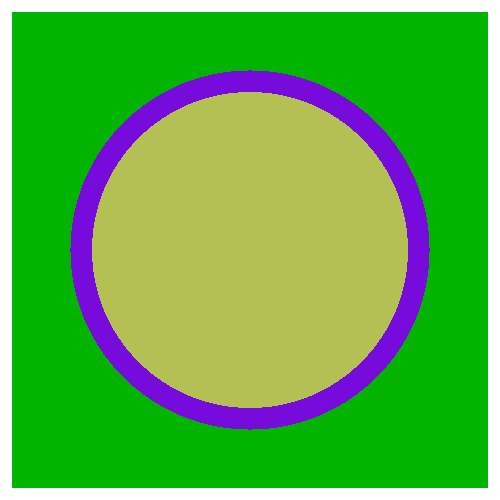

In [100]:
# export needed for plotting
model.materials.export_to_xml()
model.geometry.export_to_xml()

plot = openmc.Plot()
plot.filename = 'pin_cell'
plot.from_geometry(model.geometry)
plot.pixels = (500, 500)
dr = pitch * 0.05
plot.width = (pitch+dr, pitch+dr)
plot.origin = (0., 0., 0)
plot.color_by = 'cell'

model.plots = openmc.Plots([plot])
plot.to_ipython_image(openmc_exec='openmc', cwd='./')

###  Settings

In [101]:
settings = openmc.Settings()

bounds = [-pitch/2, -pitch/2, -rod_height/2, pitch/2, +pitch/2, rod_height/2]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)

source = openmc.IndependentSource(space=uniform_dist)

settings.source = source

settings.batches = 30
settings.inactive = 20
settings.particles = 20000
settings.keff_trigger = {'type':'std_dev','threshold':0.00030}
settings.trigger_active = True
settings.trigger_max_batches = 50000
settings.output = {'tallies':True}

settings.temperature['method'] = 'interpolation'

model.settings = settings

settings_file = settings

### Tallies

In [102]:
tallies = openmc.Tallies()
model.tallies = tallies

### Define and choose energy group

In [103]:
egroup_name = 'XMAS-172'
egroup = openmc.mgxs.GROUP_STRUCTURES[egroup_name]

### Create MGXS tallies for mgxs directory

In [104]:
mgxs_lib_dict = {}

pn_order = [0,1,3,5,7]

for pn in pn_order:
    
    mgxs_lib_ = openmc.mgxs.Library(model.geometry)
    groups = openmc.mgxs.EnergyGroups(egroup)

    mgxs_lib_.energy_groups = groups
    mgxs_lib_.scatter_format = "legendre"
    mgxs_lib_.mgxs_types = ['transport','nu-transport','absorption', 'nu-fission', 'fission' ,\
                                  'chi', 'consistent scatter matrix', 'multiplicity matrix','total',\
                                  'consistent nu-scatter matrix']

    mgxs_lib_.legendre_order = pn
    if pn == 0:
        mgxs_lib_.correction = None
        
    mgxs_lib_.by_nuclide = False
    mgxs_lib_.domain_type = 'cell'
    mgxs_lib_.domains = model.geometry.get_all_material_cells().values()
    mgxs_lib_.build_library()
    mgxs_lib_.check_library_for_openmc_mgxs()
    
    mgxs_lib_.add_to_tallies_file(tallies, merge=False)
    
    mgxs_lib_dict[pn] = copy.deepcopy(mgxs_lib_)

/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 1 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 3 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 5 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


### Create power tally

In [105]:
## model.export_to_model_xml('model_iso.xml')

### Run OpenMC model

In [106]:
statepoint_filename = model.run()

/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=901.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=902.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=903.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=904.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=921.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=931.
  warn(msg, IDWarning)
/Users/jean.ragu

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       42/1    1.20649    1.18832 +/- 0.00224
 Triggers unsatisfied, max unc./thresh. is 5.068903374791999 for eigenvalue
 The estimated number of batches is 586
       43/1    1.19154    1.18846 +/- 0.00214
 Triggers unsatisfied, max unc./thresh. is 4.88325197322456 for eigenvalue
 The estimated number of batches is 569
       44/1    1.19059    1.18855 +/- 0.00205
 Triggers unsatisfied, max unc./thresh. is 4.696196417058885 for eigenvalue
 The estimated number of batches is 550
       45/1    1.17200    1.18789 +/- 0.00208
 Triggers unsatisfied, max unc./thresh. is 4.43711379893817 for eigenvalue
 The estimated number of batches is 513
       46/1    1.19117    1.18802 +/- 0.00200
 Triggers unsatisfied, max unc./thresh. is 4.279355214917679 for eigenvalue
 The estimated number of batches is 497
       47/1    1.19021    1.18810 +/- 0.00193
 Triggers unsatisfied, max unc./thresh. is 4.179002142622777 for eigenvalue
 The estimated number of batches is 492
       48/1    1.18768    1.18

       93/1    1.18185    1.18570 +/- 0.00131
 Triggers unsatisfied, max unc./thresh. is 2.795111324501052 for eigenvalue
 The estimated number of batches is 591
       94/1    1.16330    1.18539 +/- 0.00132
 Triggers unsatisfied, max unc./thresh. is 2.8073118843812925 for eigenvalue
 The estimated number of batches is 604
       95/1    1.18356    1.18537 +/- 0.00131
 Triggers unsatisfied, max unc./thresh. is 2.774054482303851 for eigenvalue
 The estimated number of batches is 598
       96/1    1.18687    1.18539 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.7610729271267145 for eigenvalue
 The estimated number of batches is 600
       97/1    1.16369    1.18511 +/- 0.00130
 Triggers unsatisfied, max unc./thresh. is 2.81289261161437 for eigenvalue
 The estimated number of batches is 630
       98/1    1.19096    1.18518 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.7848652293984357 for eigenvalue
 The estimated number of batches is 625
       99/1    1.20209    

      144/1    1.19563    1.18578 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.9292379599998932 for eigenvalue
 The estimated number of batches is 482
      145/1    1.19259    1.18583 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.914429780999445 for eigenvalue
 The estimated number of batches is 479
      146/1    1.17604    1.18575 +/- 0.00097
 Triggers unsatisfied, max unc./thresh. is 1.910355153481554 for eigenvalue
 The estimated number of batches is 480
      147/1    1.18438    1.18574 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.900604760973475 for eigenvalue
 The estimated number of batches is 479
      148/1    1.19933    1.18585 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.891511344953871 for eigenvalue
 The estimated number of batches is 478
      149/1    1.17377    1.18575 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.8846483134099272 for eigenvalue
 The estimated number of batches is 479
      150/1    1.20365    

      195/1    1.20106    1.18551 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.575308388292461 for eigenvalue
 The estimated number of batches is 455
      196/1    1.18012    1.18548 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.566704503717498 for eigenvalue
 The estimated number of batches is 453
      197/1    1.17082    1.18540 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.5688272720872583 for eigenvalue
 The estimated number of batches is 456
      198/1    1.17286    1.18533 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.5630191850531505 for eigenvalue
 The estimated number of batches is 455
      199/1    1.20126    1.18542 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.5556062928704648 for eigenvalue
 The estimated number of batches is 454
      200/1    1.19539    1.18547 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.5472709931989699 for eigenvalue
 The estimated number of batches is 451
      201/1    1.18081  

      246/1    1.19270    1.18541 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.3528665851424013 for eigenvalue
 The estimated number of batches is 434
      247/1    1.18463    1.18541 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.346593587602114 for eigenvalue
 The estimated number of batches is 432
      248/1    1.18636    1.18541 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.3458468803686068 for eigenvalue
 The estimated number of batches is 433
      249/1    1.18592    1.18541 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.3439998016044168 for eigenvalue
 The estimated number of batches is 434
      250/1    1.17765    1.18538 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.3414931863906403 for eigenvalue
 The estimated number of batches is 434
      251/1    1.18179    1.18536 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.3366924835464336 for eigenvalue
 The estimated number of batches is 433
      252/1    1.17693 

      297/1    1.18142    1.18541 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.2295165561230634 for eigenvalue
 The estimated number of batches is 439
      298/1    1.20251    1.18547 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.2276628841444586 for eigenvalue
 The estimated number of batches is 439
      299/1    1.19134    1.18549 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.2243871874309318 for eigenvalue
 The estimated number of batches is 439
      300/1    1.20036    1.18555 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.2196623839087526 for eigenvalue
 The estimated number of batches is 437
      301/1    1.19266    1.18557 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.2157910299493364 for eigenvalue
 The estimated number of batches is 436
      302/1    1.18806    1.18558 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.2119575259006576 for eigenvalue
 The estimated number of batches is 435
      303/1    1.18239

      348/1    1.19365    1.18560 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1569343595205555 for eigenvalue
 The estimated number of batches is 460
      349/1    1.20106    1.18565 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1557914265215667 for eigenvalue
 The estimated number of batches is 460
      350/1    1.18224    1.18564 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1523229990925425 for eigenvalue
 The estimated number of batches is 459
      351/1    1.19508    1.18567 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1494568272806969 for eigenvalue
 The estimated number of batches is 458
      352/1    1.18897    1.18568 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1469097747502444 for eigenvalue
 The estimated number of batches is 457
      353/1    1.20134    1.18573 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.144981574123154 for eigenvalue
 The estimated number of batches is 457
      354/1    1.18982 

      399/1    1.17120    1.18595 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0715013589257392 for eigenvalue
 The estimated number of batches is 456
      400/1    1.19875    1.18598 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0755127555214448 for eigenvalue
 The estimated number of batches is 460
      401/1    1.19151    1.18600 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0732042385836005 for eigenvalue
 The estimated number of batches is 459
      402/1    1.20354    1.18604 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0714451732833437 for eigenvalue
 The estimated number of batches is 459
      403/1    1.19059    1.18606 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0688177022438516 for eigenvalue
 The estimated number of batches is 458
      404/1    1.18731    1.18606 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0663359693728138 for eigenvalue
 The estimated number of batches is 457
      405/1    1.18999

      450/1    1.18246    1.18663 +/- 0.00052
 Triggers unsatisfied, max unc./thresh. is 1.0005297860173685 for eigenvalue
 The estimated number of batches is 451
      451/1    1.18702    1.18663 +/- 0.00052
 Triggers satisfied for batch 451
 Creating state point statepoint.00451.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 3.5224e+00 seconds
   Reading cross sections          = 3.5014e+00 seconds
 Total time in simulation          = 8.0578e+02 seconds
   Time in transport only          = 7.8890e+02 seconds
   Time in inactive batches        = 2.7311e+00 seconds
   Time in active batches          = 8.0305e+02 seconds
   Time synchronizing fission bank = 2.7399e-01 seconds
     Sampling source sites         = 2.4619e-01 seconds
     SEND/RECV source sites        = 2.7623e-02 seconds
   Time accumulating tallies       = 1.6062e+01 seconds
   Time writing statepoints        = 4.2512e-01 seconds
 Total time for f

In [107]:
ce_spfile = f'./statepoint_{egroup_name}_ce.h5'
ce_sumfile = f'./summary_{egroup_name}_ce.h5'
print(ce_spfile)

./statepoint_XMAS-172_ce.h5


In [108]:
os.rename(statepoint_filename, ce_spfile)
os.rename('summary.h5', ce_sumfile)

In [109]:
# trick to make several runs work with jupyter
try:
    sp 
    print('sp found')
    sp.close()
except NameError:
    print('sp NOT found')

sp found


In [110]:
sp = openmc.StatePoint(ce_spfile, autolink=False)
su = openmc.Summary(ce_sumfile)
sp.link_with_summary(su)

In [111]:
for pn in pn_order:
    print("pn=",pn)
    mgxs_lib_order = copy.deepcopy(mgxs_lib_dict[pn])
    
    mgxs_lib_order.load_from_statepoint(sp)
    
# this may not be necessary:
#     mgxs_file_order = mgxs_lib_order.create_mg_library(xs_type='macro', \
#                                                     xsdata_names=['fuel', 'clad', 'moderator'])
        
    mgxs_file_order, materials_file, geometry_file = mgxs_lib_order.create_mg_mode(\
                                                        xsdata_names=['fuel', 'clad', 'moderator'])

    mgxs_file_order.xsdatas[0].temperatures=[565.]
    mgxs_file_order.xsdatas[1].temperatures=[565.]
    mgxs_file_order.xsdatas[2].temperatures=[565.]

    mgxs_file_order.export_to_hdf5(f'mgxs_order{pn}_{egroup_name}.h5')
    materials_file.cross_sections = f'mgxs_order{pn}_{egroup_name}.h5'
    
    model_order = openmc.Model()
    model_order.materials = materials_file
    model_order.geometry = geometry_file
    settings_file.energy_mode = 'multi-group'
    model_order.settings = settings_file   
    
    statepoint_filename_order = model_order.run()

pn= 0
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ###############

 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.16604
        2/1    1.19871


        3/1    1.19550
        4/1    1.16360
        5/1    1.18890
        6/1    1.19257
        7/1    1.18796
        8/1    1.18507
        9/1    1.18460
       10/1    1.18705
       11/1    1.18346
       12/1    1.17335
       13/1    1.16700
       14/1    1.18335
       15/1    1.17179
       16/1    1.18209
       17/1    1.18507
       18/1    1.17804
       19/1    1.16630
       20/1    1.17961
       21/1    1.18486
       22/1    1.18152    1.18319 +/- 0.00167
       23/1    1.18866    1.18501 +/- 0.00206
       24/1    1.18082    1.18397 +/- 0.00180
       25/1    1.17695    1.18256 +/- 0.00198
       26/1    1.18989    1.18378 +/- 0.00202
       27/1    1.18562    1.18405 +/- 0.00173
       28/1    1.17300    1.18266 +/- 0.00204
       29/1    1.16797    1.18103 +/- 0.00243
       30/1    1.16353    1.17928 +/- 0.00279
 Triggers unsatisfied, max unc./thresh. is 6.339186470543199 for eigenvalue
 The estimated number of batches is 422
 Creating state point statepoint.

       78/1    1.17371    1.17954 +/- 0.00132
 Triggers unsatisfied, max unc./thresh. is 2.5489401494557327 for eigenvalue
 The estimated number of batches is 397
       79/1    1.17906    1.17953 +/- 0.00130
 Triggers unsatisfied, max unc./thresh. is 2.510774143188508 for eigenvalue
 The estimated number of batches is 392
       80/1    1.18834    1.17968 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.470997861386736 for eigenvalue
 The estimated number of batches is 387
       81/1    1.18732    1.17980 +/- 0.00127
 Triggers unsatisfied, max unc./thresh. is 2.4840073220745698 for eigenvalue
 The estimated number of batches is 397
       82/1    1.18276    1.17985 +/- 0.00125
 Triggers unsatisfied, max unc./thresh. is 2.4691686420455206 for eigenvalue
 The estimated number of batches is 399
       83/1    1.18448    1.17993 +/- 0.00123
 Triggers unsatisfied, max unc./thresh. is 2.4321259365785437 for eigenvalue
 The estimated number of batches is 393
       84/1    1.18998  

      129/1    1.17490    1.18032 +/- 0.00099
 Triggers unsatisfied, max unc./thresh. is 1.8324575224140383 for eigenvalue
 The estimated number of batches is 387
      130/1    1.18144    1.18033 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.8294144929072762 for eigenvalue
 The estimated number of batches is 389
      131/1    1.18707    1.18039 +/- 0.00097
 Triggers unsatisfied, max unc./thresh. is 1.8129932990037834 for eigenvalue
 The estimated number of batches is 385
      132/1    1.18536    1.18043 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.796896559854374 for eigenvalue
 The estimated number of batches is 382
      133/1    1.19259    1.18054 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.7950871518585643 for eigenvalue
 The estimated number of batches is 385
      134/1    1.19582    1.18067 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.8192188763907944 for eigenvalue
 The estimated number of batches is 398
      135/1    1.18223 

      183/1    1.19615    1.18122 +/- 0.00078
 Triggers unsatisfied, max unc./thresh. is 1.5738865613876813 for eigenvalue
 The estimated number of batches is 424
      184/1    1.18394    1.18123 +/- 0.00078
 Triggers unsatisfied, max unc./thresh. is 1.5638741271883123 for eigenvalue
 The estimated number of batches is 422
      185/1    1.18520    1.18126 +/- 0.00077
 Triggers unsatisfied, max unc./thresh. is 1.5575787261333065 for eigenvalue
 The estimated number of batches is 421
      186/1    1.19328    1.18133 +/- 0.00077
 Triggers unsatisfied, max unc./thresh. is 1.548740112436371 for eigenvalue
 The estimated number of batches is 419
      187/1    1.19206    1.18139 +/- 0.00077
 Triggers unsatisfied, max unc./thresh. is 1.5412109176300781 for eigenvalue
 The estimated number of batches is 417
      188/1    1.18350    1.18141 +/- 0.00077
 Triggers unsatisfied, max unc./thresh. is 1.5325216862527509 for eigenvalue
 The estimated number of batches is 415
      189/1    1.16023 

      237/1    1.18352    1.18154 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2999901425992297 for eigenvalue
 The estimated number of batches is 387
      238/1    1.17024    1.18149 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.3017617242685138 for eigenvalue
 The estimated number of batches is 390
      239/1    1.19200    1.18153 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.296305581672202 for eigenvalue
 The estimated number of batches is 389
      240/1    1.18751    1.18156 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2946187059073297 for eigenvalue
 The estimated number of batches is 389
      241/1    1.16842    1.18150 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2882201020397357 for eigenvalue
 The estimated number of batches is 387
      242/1    1.19932    1.18158 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2862319833995688 for eigenvalue
 The estimated number of batches is 388
      243/1    1.17121 

      289/1    1.18804    1.18102 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1476357753090487 for eigenvalue
 The estimated number of batches is 375
      290/1    1.17912    1.18102 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1437975820507198 for eigenvalue
 The estimated number of batches is 374
      291/1    1.17092    1.18098 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.141516087368392 for eigenvalue
 The estimated number of batches is 374
      292/1    1.18194    1.18098 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1383370351710715 for eigenvalue
 The estimated number of batches is 373
      293/1    1.19186    1.18102 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1348405066236043 for eigenvalue
 The estimated number of batches is 372
      294/1    1.19167    1.18106 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1320773212692545 for eigenvalue
 The estimated number of batches is 372
      295/1    1.18446 

      341/1    1.17852    1.18098 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.0408671472414965 for eigenvalue
 The estimated number of batches is 368
      342/1    1.18694    1.18099 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.0376471369011446 for eigenvalue
 The estimated number of batches is 367
      343/1    1.18848    1.18102 +/- 0.00053
 Triggers unsatisfied, max unc./thresh. is 1.0352826188306652 for eigenvalue
 The estimated number of batches is 367
      344/1    1.19842    1.18107 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.040673413206879 for eigenvalue
 The estimated number of batches is 371
      345/1    1.19751    1.18112 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.037702731835411 for eigenvalue
 The estimated number of batches is 370
      346/1    1.18619    1.18114 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.0346860896490455 for eigenvalue
 The estimated number of batches is 370
      347/1    1.17898  

 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.17525
        2/1    1.18265


        3/1    1.18723
        4/1    1.17670
        5/1    1.18274
        6/1    1.17891
        7/1    1.17762
        8/1    1.18327
        9/1    1.19012
       10/1    1.18714
       11/1    1.19438
       12/1    1.17744
       13/1    1.18386
       14/1    1.17929
       15/1    1.19893
       16/1    1.18286
       17/1    1.18243
       18/1    1.18576
       19/1    1.16519
       20/1    1.19078
       21/1    1.20289
       22/1    1.19594    1.19941 +/- 0.00347
       23/1    1.18830    1.19571 +/- 0.00421
       24/1    1.17958    1.19168 +/- 0.00501
       25/1    1.17536    1.18841 +/- 0.00507
       26/1    1.20472    1.19113 +/- 0.00495
       27/1    1.17930    1.18944 +/- 0.00452
       28/1    1.18690    1.18912 +/- 0.00392
       29/1    1.18855    1.18906 +/- 0.00346
       30/1    1.19537    1.18969 +/- 0.00316
 Triggers unsatisfied, max unc./thresh. is 6.42855167768398 for eigenvalue
 The estimated number of batches is 434
 Creating state point statepoint.0

       78/1    1.16375    1.18013 +/- 0.00157
 Triggers unsatisfied, max unc./thresh. is 2.6546179946652053 for eigenvalue
 The estimated number of batches is 429
       79/1    1.19565    1.18039 +/- 0.00157
 Triggers unsatisfied, max unc./thresh. is 2.635968647973479 for eigenvalue
 The estimated number of batches is 430
       80/1    1.16287    1.18010 +/- 0.00157
 Triggers unsatisfied, max unc./thresh. is 2.6564543408448604 for eigenvalue
 The estimated number of batches is 444
       81/1    1.18187    1.18013 +/- 0.00154
 Triggers unsatisfied, max unc./thresh. is 2.6097985452323704 for eigenvalue
 The estimated number of batches is 436
       82/1    1.17334    1.18002 +/- 0.00152
 Triggers unsatisfied, max unc./thresh. is 2.5701312080633505 for eigenvalue
 The estimated number of batches is 430
       83/1    1.17845    1.17999 +/- 0.00150
 Triggers unsatisfied, max unc./thresh. is 2.5323079514314 for eigenvalue
 The estimated number of batches is 424
       84/1    1.18794    

      129/1    1.16843    1.18053 +/- 0.00113
 Triggers unsatisfied, max unc./thresh. is 1.9695407935463607 for eigenvalue
 The estimated number of batches is 443
      130/1    1.16577    1.18039 +/- 0.00112
 Triggers unsatisfied, max unc./thresh. is 1.9571363830259743 for eigenvalue
 The estimated number of batches is 442
      131/1    1.17535    1.18035 +/- 0.00111
 Triggers unsatisfied, max unc./thresh. is 1.943129724988513 for eigenvalue
 The estimated number of batches is 440
      132/1    1.17193    1.18027 +/- 0.00111
 Triggers unsatisfied, max unc./thresh. is 1.9256819996125918 for eigenvalue
 The estimated number of batches is 436
      133/1    1.19051    1.18036 +/- 0.00110
 Triggers unsatisfied, max unc./thresh. is 1.9088873899983212 for eigenvalue
 The estimated number of batches is 432
      134/1    1.18188    1.18037 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 1.8907504924597778 for eigenvalue
 The estimated number of batches is 428
      135/1    1.19065 

      181/1    1.17113    1.18127 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.5133444355913166 for eigenvalue
 The estimated number of batches is 389
      182/1    1.18450    1.18129 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.5045109642032666 for eigenvalue
 The estimated number of batches is 387
      183/1    1.15742    1.18114 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.509919661700231 for eigenvalue
 The estimated number of batches is 392
      184/1    1.19079    1.18120 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.5024404090685237 for eigenvalue
 The estimated number of batches is 391
      185/1    1.17687    1.18117 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.5004885916677946 for eigenvalue
 The estimated number of batches is 392
      186/1    1.18861    1.18122 +/- 0.00088
 Triggers unsatisfied, max unc./thresh. is 1.49549656968609 for eigenvalue
 The estimated number of batches is 392
      187/1    1.17612   

      233/1    1.16827    1.18136 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.3069529488812033 for eigenvalue
 The estimated number of batches is 384
      234/1    1.18805    1.18139 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.303066638623177 for eigenvalue
 The estimated number of batches is 384
      235/1    1.17250    1.18135 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.297912542135402 for eigenvalue
 The estimated number of batches is 383
      236/1    1.20417    1.18145 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.2925520760140399 for eigenvalue
 The estimated number of batches is 381
      237/1    1.19738    1.18153 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.291301593924031 for eigenvalue
 The estimated number of batches is 382
      238/1    1.18977    1.18156 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.2887818815145597 for eigenvalue
 The estimated number of batches is 383
      239/1    1.18658   

      285/1    1.17459    1.18183 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.195197679204082 for eigenvalue
 The estimated number of batches is 399
      286/1    1.18070    1.18183 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.1907492196734226 for eigenvalue
 The estimated number of batches is 398
      287/1    1.18717    1.18185 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.1911722290171354 for eigenvalue
 The estimated number of batches is 399
      288/1    1.16712    1.18179 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.1864556174933703 for eigenvalue
 The estimated number of batches is 398
      289/1    1.17237    1.18176 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.1816874824747732 for eigenvalue
 The estimated number of batches is 396
      290/1    1.19849    1.18182 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.1811154738836873 for eigenvalue
 The estimated number of batches is 397
      291/1    1.18246 

      336/1    1.18455    1.18147 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.075516651677807 for eigenvalue
 The estimated number of batches is 386
      337/1    1.17936    1.18147 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0736804739477686 for eigenvalue
 The estimated number of batches is 386
      338/1    1.18286    1.18147 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0736139991486309 for eigenvalue
 The estimated number of batches is 387
      339/1    1.16494    1.18142 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0698621116767988 for eigenvalue
 The estimated number of batches is 386
      340/1    1.17962    1.18141 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0666126075205273 for eigenvalue
 The estimated number of batches is 385
      341/1    1.17248    1.18139 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.063412461845353 for eigenvalue
 The estimated number of batches is 384
      342/1    1.17749  

      390/1    1.20103    1.18154 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.02084274987569 for eigenvalue
 The estimated number of batches is 406
      391/1    1.19174    1.18157 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.018245355922792 for eigenvalue
 The estimated number of batches is 405
      392/1    1.17371    1.18154 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0152638113425505 for eigenvalue
 The estimated number of batches is 404
      393/1    1.17579    1.18153 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0157416234525938 for eigenvalue
 The estimated number of batches is 405
      394/1    1.16375    1.18148 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0135875491080142 for eigenvalue
 The estimated number of batches is 405
      395/1    1.17640    1.18147 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.012432828153842 for eigenvalue
 The estimated number of batches is 405
      396/1    1.19332    

 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.19796
        2/1    1.18373


        3/1    1.18898
        4/1    1.18229
        5/1    1.16969
        6/1    1.19211
        7/1    1.17906
        8/1    1.19208
        9/1    1.18824
       10/1    1.17119
       11/1    1.17024
       12/1    1.16896
       13/1    1.20324
       14/1    1.18902
       15/1    1.19341
       16/1    1.17575
       17/1    1.18769
       18/1    1.18848
       19/1    1.18733
       20/1    1.19021
       21/1    1.17479
       22/1    1.19316    1.18398 +/- 0.00918
       23/1    1.15831    1.17542 +/- 0.01006
       24/1    1.17700    1.17582 +/- 0.00713
       25/1    1.17789    1.17623 +/- 0.00554
       26/1    1.18100    1.17703 +/- 0.00459
       27/1    1.19908    1.18018 +/- 0.00500
       28/1    1.19994    1.18265 +/- 0.00498
       29/1    1.19734    1.18428 +/- 0.00469
       30/1    1.17886    1.18374 +/- 0.00423
 Triggers unsatisfied, max unc./thresh. is 9.578381285821875 for eigenvalue
 The estimated number of batches is 938
 Creating state point statepoint.

       77/1    1.17536    1.18365 +/- 0.00133
 Triggers unsatisfied, max unc./thresh. is 2.3859871580806638 for eigenvalue
 The estimated number of batches is 345
       78/1    1.18373    1.18365 +/- 0.00131
 Triggers unsatisfied, max unc./thresh. is 2.3442317737135308 for eigenvalue
 The estimated number of batches is 339
       79/1    1.16908    1.18340 +/- 0.00131
 Triggers unsatisfied, max unc./thresh. is 2.3498422485150336 for eigenvalue
 The estimated number of batches is 346
       80/1    1.17130    1.18320 +/- 0.00130
 Triggers unsatisfied, max unc./thresh. is 2.3116848778475005 for eigenvalue
 The estimated number of batches is 341
       81/1    1.18283    1.18320 +/- 0.00128
 Triggers unsatisfied, max unc./thresh. is 2.2773950409552146 for eigenvalue
 The estimated number of batches is 337
       82/1    1.16771    1.18295 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.2390502649238693 for eigenvalue
 The estimated number of batches is 331
       83/1    1.18469

      131/1    1.17158    1.18248 +/- 0.00093
 Triggers unsatisfied, max unc./thresh. is 1.6438875611963921 for eigenvalue
 The estimated number of batches is 320
      132/1    1.18538    1.18250 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.6289099185898728 for eigenvalue
 The estimated number of batches is 318
      133/1    1.17186    1.18241 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.6299622535650082 for eigenvalue
 The estimated number of batches is 321
      134/1    1.17462    1.18234 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.6364871293829413 for eigenvalue
 The estimated number of batches is 326
      135/1    1.19344    1.18244 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.644623325321762 for eigenvalue
 The estimated number of batches is 332
      136/1    1.19425    1.18254 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.6373557605986333 for eigenvalue
 The estimated number of batches is 331
      137/1    1.18382 

      185/1    1.18191    1.18215 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.4070700143915458 for eigenvalue
 The estimated number of batches is 347
      186/1    1.18053    1.18214 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.3986764487820178 for eigenvalue
 The estimated number of batches is 345
      187/1    1.18166    1.18214 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.3906018569645764 for eigenvalue
 The estimated number of batches is 343
      188/1    1.16665    1.18205 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.384164362907598 for eigenvalue
 The estimated number of batches is 342
      189/1    1.18184    1.18205 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.381662287995408 for eigenvalue
 The estimated number of batches is 343
      190/1    1.18758    1.18208 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.373671545138209 for eigenvalue
 The estimated number of batches is 341
      191/1    1.18719   

      237/1    1.17298    1.18114 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.217015833866887 for eigenvalue
 The estimated number of batches is 342
      238/1    1.16876    1.18109 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.2117986118158228 for eigenvalue
 The estimated number of batches is 341
      239/1    1.17994    1.18108 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.2066629542414276 for eigenvalue
 The estimated number of batches is 339
      240/1    1.17901    1.18107 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2014849232787952 for eigenvalue
 The estimated number of batches is 338
      241/1    1.17224    1.18103 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.1969943427559142 for eigenvalue
 The estimated number of batches is 337
      242/1    1.18827    1.18106 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.1919218709005852 for eigenvalue
 The estimated number of batches is 336
      243/1    1.19352 

      289/1    1.18794    1.18113 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1109436457926705 for eigenvalue
 The estimated number of batches is 352
      290/1    1.17371    1.18110 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.107400618311151 for eigenvalue
 The estimated number of batches is 352
      291/1    1.19028    1.18113 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1031462267594654 for eigenvalue
 The estimated number of batches is 350
      292/1    1.16684    1.18108 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1101874917862382 for eigenvalue
 The estimated number of batches is 356
      293/1    1.20012    1.18115 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1145918937584598 for eigenvalue
 The estimated number of batches is 360
      294/1    1.19786    1.18121 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1160557927210175 for eigenvalue
 The estimated number of batches is 362
      295/1    1.17472 

      342/1    1.17818    1.18110 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.0627882242410311 for eigenvalue
 The estimated number of batches is 384
      343/1    1.18607    1.18111 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.0598302197870444 for eigenvalue
 The estimated number of batches is 383
      344/1    1.17662    1.18110 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.0573234517042212 for eigenvalue
 The estimated number of batches is 383
      345/1    1.18930    1.18112 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0542222801531846 for eigenvalue
 The estimated number of batches is 382
      346/1    1.19436    1.18116 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0547005734390955 for eigenvalue
 The estimated number of batches is 383
      347/1    1.19524    1.18121 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0515844163039847 for eigenvalue
 The estimated number of batches is 382
      348/1    1.17489

 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.17261
        2/1    1.17814


        3/1    1.17556
        4/1    1.19151
        5/1    1.18343
        6/1    1.17479
        7/1    1.19258
        8/1    1.17565
        9/1    1.18398
       10/1    1.17048
       11/1    1.17578
       12/1    1.18246
       13/1    1.19874
       14/1    1.16570
       15/1    1.21031
       16/1    1.16239
       17/1    1.18217
       18/1    1.17125
       19/1    1.17824
       20/1    1.20323
       21/1    1.17215
       22/1    1.18219    1.17717 +/- 0.00502
       23/1    1.17647    1.17693 +/- 0.00291
       24/1    1.17873    1.17738 +/- 0.00210
       25/1    1.17222    1.17635 +/- 0.00193
       26/1    1.18326    1.17750 +/- 0.00195
       27/1    1.19414    1.17988 +/- 0.00289
       28/1    1.20913    1.18354 +/- 0.00443
       29/1    1.17557    1.18265 +/- 0.00401
       30/1    1.18342    1.18273 +/- 0.00359
 Triggers unsatisfied, max unc./thresh. is 8.057119535949377 for eigenvalue
 The estimated number of batches is 670
 Creating state point statepoint.

       76/1    1.19277    1.18088 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.4422485781318746 for eigenvalue
 The estimated number of batches is 355
       77/1    1.17702    1.18081 +/- 0.00127
 Triggers unsatisfied, max unc./thresh. is 2.4377528873131955 for eigenvalue
 The estimated number of batches is 359
       78/1    1.18565    1.18090 +/- 0.00125
 Triggers unsatisfied, max unc./thresh. is 2.417764731946301 for eigenvalue
 The estimated number of batches is 360
       79/1    1.17567    1.18081 +/- 0.00123
 Triggers unsatisfied, max unc./thresh. is 2.3943538254543375 for eigenvalue
 The estimated number of batches is 359
       80/1    1.17194    1.18066 +/- 0.00122
 Triggers unsatisfied, max unc./thresh. is 2.350037649099941 for eigenvalue
 The estimated number of batches is 352
       81/1    1.18535    1.18074 +/- 0.00120
 Triggers unsatisfied, max unc./thresh. is 2.387150183477351 for eigenvalue
 The estimated number of batches is 368
       82/1    1.18110   

      128/1    1.18770    1.17893 +/- 0.00093
 Triggers unsatisfied, max unc./thresh. is 1.7633797294186202 for eigenvalue
 The estimated number of batches is 356
      129/1    1.17215    1.17887 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.803380565041361 for eigenvalue
 The estimated number of batches is 375
      130/1    1.18805    1.17895 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.7824291746956002 for eigenvalue
 The estimated number of batches is 370
      131/1    1.17834    1.17894 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.7912515873380825 for eigenvalue
 The estimated number of batches is 377
      132/1    1.20197    1.17915 +/- 0.00093
 Triggers unsatisfied, max unc./thresh. is 1.8000752371959003 for eigenvalue
 The estimated number of batches is 383
      133/1    1.16938    1.17906 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.78681728366115 for eigenvalue
 The estimated number of batches is 381
      134/1    1.17821   

      182/1    1.18153    1.18079 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.5662625985742396 for eigenvalue
 The estimated number of batches is 418
      183/1    1.19094    1.18085 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.5604450494309763 for eigenvalue
 The estimated number of batches is 417
      184/1    1.17530    1.18082 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.5523447715229457 for eigenvalue
 The estimated number of batches is 416
      185/1    1.16903    1.18075 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.546241211745467 for eigenvalue
 The estimated number of batches is 415
      186/1    1.17356    1.18070 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.5411554211700536 for eigenvalue
 The estimated number of batches is 415
      187/1    1.17231    1.18065 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.5383331158942772 for eigenvalue
 The estimated number of batches is 416
      188/1    1.19786 

      234/1    1.18895    1.18112 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.3944404893731657 for eigenvalue
 The estimated number of batches is 437
      235/1    1.16816    1.18106 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.3891708026082326 for eigenvalue
 The estimated number of batches is 435
      236/1    1.17749    1.18105 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.3833315231275283 for eigenvalue
 The estimated number of batches is 434
      237/1    1.17460    1.18102 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.37786441609615 for eigenvalue
 The estimated number of batches is 432
      238/1    1.18537    1.18104 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.3730489236454944 for eigenvalue
 The estimated number of batches is 431
      239/1    1.16847    1.18098 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.366381336830907 for eigenvalue
 The estimated number of batches is 429
      240/1    1.17192   

      286/1    1.19694    1.18101 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.2025717757804777 for eigenvalue
 The estimated number of batches is 405
      287/1    1.19390    1.18106 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.1975778134497892 for eigenvalue
 The estimated number of batches is 403
      288/1    1.17131    1.18102 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.1928311377686358 for eigenvalue
 The estimated number of batches is 402
      289/1    1.19997    1.18110 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.1891889138819565 for eigenvalue
 The estimated number of batches is 401
      290/1    1.17192    1.18106 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.1849061826550464 for eigenvalue
 The estimated number of batches is 400
      291/1    1.17516    1.18104 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.1822002763118888 for eigenvalue
 The estimated number of batches is 399
      292/1    1.16766

      338/1    1.17796    1.18111 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0700114330918415 for eigenvalue
 The estimated number of batches is 385
      339/1    1.18566    1.18113 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0680314685092527 for eigenvalue
 The estimated number of batches is 384
      340/1    1.17242    1.18110 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0645066195315214 for eigenvalue
 The estimated number of batches is 383
      341/1    1.17904    1.18109 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0620141160466297 for eigenvalue
 The estimated number of batches is 383
      342/1    1.17562    1.18108 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0587340289399019 for eigenvalue
 The estimated number of batches is 381
      343/1    1.18480    1.18109 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.055879534310222 for eigenvalue
 The estimated number of batches is 381
      344/1    1.17288 

 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.18786
        2/1    1.19162


        3/1    1.18260
        4/1    1.19234
        5/1    1.17012
        6/1    1.17286
        7/1    1.17986
        8/1    1.17853
        9/1    1.17903
       10/1    1.17875
       11/1    1.16787
       12/1    1.16081
       13/1    1.17582
       14/1    1.19131
       15/1    1.17260
       16/1    1.17725
       17/1    1.16280
       18/1    1.18196
       19/1    1.16848
       20/1    1.19173
       21/1    1.17951
       22/1    1.20424    1.19188 +/- 0.01236
       23/1    1.19863    1.19413 +/- 0.00748
       24/1    1.18852    1.19273 +/- 0.00548
       25/1    1.15922    1.18602 +/- 0.00793
       26/1    1.18184    1.18533 +/- 0.00651
       27/1    1.19309    1.18644 +/- 0.00561
       28/1    1.17043    1.18444 +/- 0.00526
       29/1    1.20807    1.18706 +/- 0.00533
       30/1    1.20406    1.18876 +/- 0.00506
 Triggers unsatisfied, max unc./thresh. is 6.966414515767875 for eigenvalue
 The estimated number of batches is 506
 Creating state point statepoint.

       78/1    1.18277    1.18263 +/- 0.00176
 Triggers unsatisfied, max unc./thresh. is 2.901784415929476 for eigenvalue
 The estimated number of batches is 509
       79/1    1.16993    1.18242 +/- 0.00174
 Triggers unsatisfied, max unc./thresh. is 2.852603237633034 for eigenvalue
 The estimated number of batches is 501
       80/1    1.16152    1.18207 +/- 0.00175
 Triggers unsatisfied, max unc./thresh. is 2.849378433065556 for eigenvalue
 The estimated number of batches is 508
       81/1    1.17650    1.18198 +/- 0.00172
 Triggers unsatisfied, max unc./thresh. is 2.8461486479783114 for eigenvalue
 The estimated number of batches is 515
       82/1    1.17891    1.18193 +/- 0.00169
 Triggers unsatisfied, max unc./thresh. is 2.7739804047254975 for eigenvalue
 The estimated number of batches is 498
       83/1    1.15513    1.18150 +/- 0.00172
 Triggers unsatisfied, max unc./thresh. is 2.7477096714067817 for eigenvalue
 The estimated number of batches is 496
       84/1    1.18147   

      131/1    1.18336    1.18164 +/- 0.00115
 Triggers unsatisfied, max unc./thresh. is 2.0505022716893397 for eigenvalue
 The estimated number of batches is 487
      132/1    1.18169    1.18164 +/- 0.00114
 Triggers unsatisfied, max unc./thresh. is 2.036251860712891 for eigenvalue
 The estimated number of batches is 485
      133/1    1.18788    1.18169 +/- 0.00114
 Triggers unsatisfied, max unc./thresh. is 2.04867113755126 for eigenvalue
 The estimated number of batches is 495
      134/1    1.17510    1.18163 +/- 0.00113
 Triggers unsatisfied, max unc./thresh. is 2.032436587829422 for eigenvalue
 The estimated number of batches is 491
      135/1    1.18012    1.18162 +/- 0.00112
 Triggers unsatisfied, max unc./thresh. is 2.0147262375376753 for eigenvalue
 The estimated number of batches is 487
      136/1    1.17900    1.18160 +/- 0.00111
 Triggers unsatisfied, max unc./thresh. is 1.9989036907646853 for eigenvalue
 The estimated number of batches is 484
      137/1    1.17285    

      185/1    1.16948    1.18174 +/- 0.00088
 Triggers unsatisfied, max unc./thresh. is 1.66920895753314 for eigenvalue
 The estimated number of batches is 480
      186/1    1.18624    1.18177 +/- 0.00088
 Triggers unsatisfied, max unc./thresh. is 1.6610896340815775 for eigenvalue
 The estimated number of batches is 479
      187/1    1.19605    1.18186 +/- 0.00087
 Triggers unsatisfied, max unc./thresh. is 1.6552990191160832 for eigenvalue
 The estimated number of batches is 478
      188/1    1.18676    1.18188 +/- 0.00087
 Triggers unsatisfied, max unc./thresh. is 1.6475081923831898 for eigenvalue
 The estimated number of batches is 476
      189/1    1.16130    1.18176 +/- 0.00087
 Triggers unsatisfied, max unc./thresh. is 1.6543052079187037 for eigenvalue
 The estimated number of batches is 483
      190/1    1.17843    1.18174 +/- 0.00087
 Triggers unsatisfied, max unc./thresh. is 1.6552762249222208 for eigenvalue
 The estimated number of batches is 486
      191/1    1.17408  

      237/1    1.16437    1.18182 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.3661719889880506 for eigenvalue
 The estimated number of batches is 426
      238/1    1.18101    1.18182 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.3614065009698544 for eigenvalue
 The estimated number of batches is 425
      239/1    1.17804    1.18180 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.3615579729217355 for eigenvalue
 The estimated number of batches is 426
      240/1    1.18300    1.18181 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.3568314923743952 for eigenvalue
 The estimated number of batches is 426
      241/1    1.19184    1.18185 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.3513879180909256 for eigenvalue
 The estimated number of batches is 424
      242/1    1.17313    1.18181 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.345075937667394 for eigenvalue
 The estimated number of batches is 422
      243/1    1.17554 

      289/1    1.18777    1.18210 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.2287626195054488 for eigenvalue
 The estimated number of batches is 427
      290/1    1.18306    1.18210 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2262156996940758 for eigenvalue
 The estimated number of batches is 426
      291/1    1.17283    1.18207 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2230185621758487 for eigenvalue
 The estimated number of batches is 426
      292/1    1.18516    1.18208 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2200234373032233 for eigenvalue
 The estimated number of batches is 425
      293/1    1.17757    1.18206 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2160499503503497 for eigenvalue
 The estimated number of batches is 424
      294/1    1.16498    1.18200 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.2111339512711232 for eigenvalue
 The estimated number of batches is 422
      295/1    1.18744

      340/1    1.19848    1.18203 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0937328736571195 for eigenvalue
 The estimated number of batches is 403
      341/1    1.17442    1.18201 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.1022088806376673 for eigenvalue
 The estimated number of batches is 410
      342/1    1.15704    1.18193 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0994402547102782 for eigenvalue
 The estimated number of batches is 410
      343/1    1.18179    1.18193 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0960242336737551 for eigenvalue
 The estimated number of batches is 409
      344/1    1.18199    1.18193 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0937498406360007 for eigenvalue
 The estimated number of batches is 408
      345/1    1.19790    1.18198 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0917239244743493 for eigenvalue
 The estimated number of batches is 408
      346/1    1.18503

      391/1    1.15853    1.18200 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.028648415347583 for eigenvalue
 The estimated number of batches is 413
      392/1    1.16702    1.18196 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.029160929245037 for eigenvalue
 The estimated number of batches is 415
      393/1    1.17119    1.18193 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0292203421055586 for eigenvalue
 The estimated number of batches is 416
      394/1    1.17405    1.18191 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0262912243182494 for eigenvalue
 The estimated number of batches is 414
      395/1    1.17906    1.18191 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0236784696775623 for eigenvalue
 The estimated number of batches is 413
      396/1    1.16344    1.18186 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0269391948120334 for eigenvalue
 The estimated number of batches is 417
      397/1    1.18299  

## Clean up by deleting unwanted files

In [113]:
import os
import re

def delete_runtime_files(directory='.'):
    """
    Deletes all files with a .xml extension, files named statepoint.NNNNN.h5 where N is a digit,
    and the file named summary.h5 in the specified directory.

    Parameters:
    directory (str): The directory to search for files. Defaults to the current directory.
    """
    
    # Regular expression pattern to match files named statepoint.NNNNN.h5
    pattern = re.compile(r'statepoint\.\d{5}\.h5')

    # Iterate through files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if the file has a .xml extension, matches the pattern, or is named summary.h5
        if filename.endswith('.xml') or pattern.match(filename) or filename == 'summary.h5' \
           or filename == 'tallies.out':
            # Delete the file
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# Example usage:
# delete_runtime_files('/path/to/directory')  # specify the directory path if needed

In [114]:
delete_runtime_files('./')

Deleted: ./statepoint.00403.h5
Deleted: ./statepoint.00369.h5
Deleted: ./statepoint.00422.h5
Deleted: ./plots.xml
Deleted: ./statepoint.00377.h5
Deleted: ./model.xml
Deleted: ./statepoint.00030.h5
Deleted: ./statepoint.00383.h5
Deleted: ./summary.h5
Deleted: ./tallies.out
Deleted: ./materials.xml
Deleted: ./geometry.xml
